# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [188]:
states_data=pd.read_csv("../data/states_edu.csv")
states_data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [156]:
states_data.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [157]:
#Remove rows without 8th Grade Math and Enroll All Est
states_data.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
states_data.dropna(subset=['ENROLL_ALL_EST'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Grade 8 Math 

How many years of data are logged in our dataset? 

In [189]:
states_data['YEAR'].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [159]:
bystate=states_data.groupby('STATE')

michigan=bystate.get_group('MICHIGAN')
michigan_avg=michigan['AVG_MATH_8_SCORE'].mean()


ohio=bystate.get_group('OHIO')
ohio_avg=ohio['AVG_MATH_8_SCORE'].mean()

if michigan_avg>ohio_avg:
    print('The average 8th grade math score for Michigan is:', michigan_avg,
          'The average 8th grade math score for Ohio is:' ,ohio_avg,
          'Michigan has a higher average outcome score.')
else:
    print('The average 8th grade math score for Michigan is:' ,michigan_avg ,
          'The average 8th grade math score for Ohio is:' , ohio_avg ,
          'Ohio has a higher average outcome score.')

The average 8th grade math score for Michigan is: 277.875 The average 8th grade math score for Ohio is: 285.125 Ohio has a higher average outcome score.


Find the average for your outcome score across all states in 2019

In [190]:
byyear=states_data.groupby('YEAR')
national=byyear.get_group(2019)

national_avg=national['AVG_MATH_8_SCORE'].mean()
print('The national average of 8th grade math scores in 2019 is:', national_avg)

The national average of 8th grade math scores in 2019 is: 281.2641509433962


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [161]:
max_outcome=bystate['AVG_MATH_8_SCORE'].max()
max_outcome

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              276.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    265.0
FLORIDA                 281.0
GEORGIA                 279.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             271.0
MISSOURI                286.0
MONTANA                 293.0
NEBRASKA                286.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_MEXICO              274.0
NEW_YORK                283.0
NORT

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [162]:
states_data.dropna(subset=['TOTAL_EXPENDITURE'], inplace=True)
states_data.dropna(subset=['INSTRUCTION_EXPENDITURE'], inplace=True)
states_data['EDUCATION_EXPENSES_PERCENTAGES']=states_data['INSTRUCTION_EXPENDITURE']/states_data['TOTAL_EXPENDITURE']
states_data['EXPENSES_PER_STUDENT']=states_data['INSTRUCTION_EXPENDITURE']/states_data['ENROLL_ALL_EST']
states_data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,EDUCATION_EXPENSES_PERCENTAGES,EXPENSES_PER_STUDENT
408,2000_ALABAMA,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,...,42512.0,472686.0,201358.0,739992.0,217.0,264.0,NaN,NaN,0.510009,3.494616
410,2000_ARIZONA,ARIZONA,2000,814807.0,5479168.0,534619.0,2481089.0,2463460.0,5397194.0,2488932.0,...,49501.0,567626.0,236933.0,877696.0,219.0,269.0,NaN,NaN,0.461153,3.054628
411,2000_ARKANSAS,ARKANSAS,2000,450751.0,2844855.0,254735.0,2126099.0,464021.0,2683400.0,1531232.0,...,28918.0,281091.0,131511.0,449959.0,216.0,257.0,NaN,NaN,0.570631,3.397068
412,2000_CALIFORNIA,CALIFORNIA,2000,5941946.0,46628207.0,4024940.0,26877920.0,15725347.0,45829753.0,23514388.0,...,357789.0,3804640.0,1707952.0,6140814.0,213.0,260.0,NaN,NaN,0.513081,3.957355
414,2000_CONNECTICUT,CONNECTICUT,2000,530363.0,5884078.0,234321.0,2298931.0,3350826.0,5605280.0,3189123.0,...,32591.0,354391.0,155734.0,562179.0,234.0,281.0,NaN,NaN,0.568950,6.013095


Feature engineering justification: I created two new columns, one for the percentage of total expenditure per year spent on education and one for the educational expenses per student. I chose these features because I wanted to explore how a state's investment into their education system and their students might impact a student's performance on tests.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

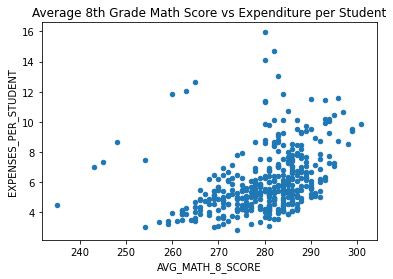

In [163]:
plot=states_data.plot.scatter(x='AVG_MATH_8_SCORE',y='EXPENSES_PER_STUDENT', title='Average 8th Grade Math Score vs Expenditure per Student')

Visualization.1: Scatter plot showing positive correlation between average 8th grade math scores and state expenditure per student. 

**Visualization 2**

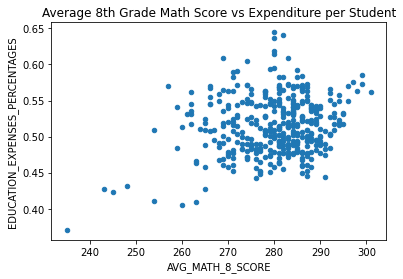

In [164]:
plot=states_data.plot.scatter(x='AVG_MATH_8_SCORE',y='EDUCATION_EXPENSES_PERCENTAGES', title='Average 8th Grade Math Score vs Expenditure per Student')

Visualization.2: Scatter plot showing a weak positive correlation between average 8th grade math scores and percentage of state budget spent on education. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
X = states_data[['EDUCATION_EXPENSES_PERCENTAGES','EXPENSES_PER_STUDENT']].dropna()
y = states_data.loc[X.index]['AVG_MATH_8_SCORE']
y.fillna(y.mean(), inplace=True)

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [192]:
from sklearn.linear_model import LinearRegression

In [193]:
model = LinearRegression()

In [194]:
model.fit(X_train, y_train)

LinearRegression()

In [195]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [196]:
#r^2
model.score(X_test, y_test)

0.12338302566267056

In [197]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

6.337405539575425

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior on Testing Set')

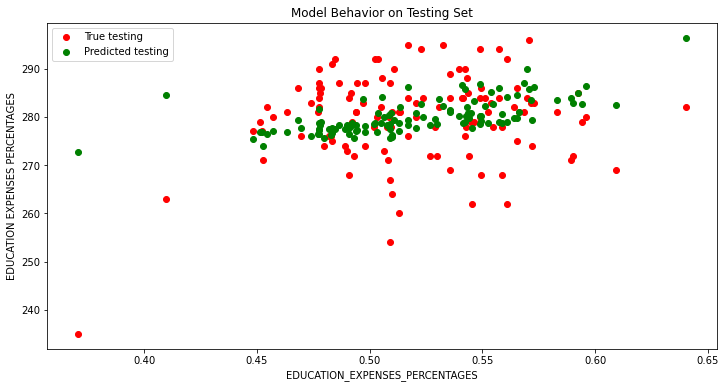

In [198]:
col_name = 'EDUCATION_EXPENSES_PERCENTAGES'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "red")
plt.scatter(X_test[col_name], model.predict(X_test), color = "green")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('EDUCATION EXPENSES PERCENTAGES')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

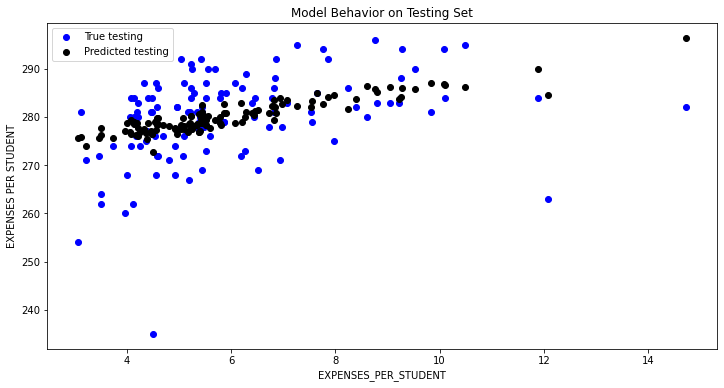

In [200]:
col_name = 'EXPENSES_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('EXPENSES PER STUDENT')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

In [201]:
#The relationship between average 8th grade math scores, the state expenditure per student and percentage of budget spent on education was examined. 
#There is a weak positive correlation between average 8th grade math scores and the percentage of a state's budget spent on correlation.
#There is a stronger positive correlation between average 8th grade math scores and the amount of money spent on a student.
#The more money a state invests in their students, the higher their math scores tend to be.
#The models created are not great. While the predicted testing does follow the same trend pattern as the true testing for both graphs, there are many outlier points.